In [1]:
import json
from urllib.request import urlopen
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

def column(matrix, i):
    return [row[i] for row in matrix]

def get_jsonparsed_data(projectId):
    response = requests.get("https://tasks.hotosm.org/api/v1/project/" + str(projectId))
    return response.json()

# Extract info from json

In [2]:
def get_jsonparsed_data(projectId):
    response = requests.get("https://tasks.hotosm.org/api/v1/project/" + str(projectId))
    return response.json()

def read_jsonfile_data(fileName):
    with open(fileName) as f:
        data = json.load(f)
    return data    
    
projects = []
project_json = read_jsonfile_data("data/project.json")

In [3]:
result = pd.DataFrame(columns=['ProjectId', 'TaskId', 'TaskStatus', 'Coordinates'])

In [4]:
validated_percent = {}

In [ ]:
for key,value in enumerate(project_json['mapResults']['features']):
    projects.append(value['properties']['projectId'])
    
for projectId in projects:
    val = 0
    task_json = get_jsonparsed_data(projectId)
    for task in task_json['tasks']['features']:
        #result = result.append({'ProjectId' : projectId,
        #               'TaskId' : task['properties']['taskId'],
        #               'TaskStatus' : task['properties']['taskStatus'],
        #               'Coordinates' : task['geometry']['coordinates']}, ignore_index = True)
        if task['properties']['taskStatus'] == "VALIDATED":
            val += 1
    validated_percent[projectId] = val / len(task_json['tasks']['features'])  
    #

In [51]:
np.set_printoptions(precision=0,suppress=True) 
final =  [int(k) for k, v in validated_percent.items() if v > 0.90]

In [52]:
final_1 = [int(k) for k, v in validated_percent.items() if v == 1]

In [53]:
# a = np.asarray(final_1)
# np.savetxt("output/project_100b.csv", a, delimiter=",")

In [54]:
# a = np.asarray(final)
# np.savetxt("output/project_90b.csv", a, delimiter=",")

# Coords of projects

In [23]:
# list of # of projects that are 100% validated
final_1 = pd.read_csv("output/project_100.csv", header=None, dtype=int)

In [24]:
def coords_of_projects(projects):
    coords = []
    for i, projectId in enumerate(projects):
        if i in [i for i in range(0, len(projects), 50)]:
            print("Parsed: %0.1f / 100" % (i / len(projects) * 100))
        task_json = get_jsonparsed_data(projectId)
        coords.append(task_json['areaOfInterest']['coordinates'][0][0])
        
    return coords

In [25]:
coords_list = coords_of_projects(final_1[0])

Parsed: 0.0 / 100
Parsed: 25.8 / 100
Parsed: 51.5 / 100
Parsed: 77.3 / 100


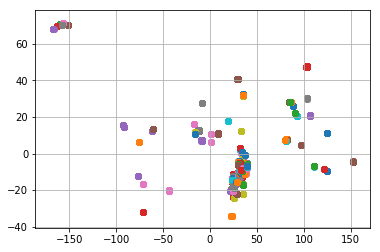

In [26]:
for coords in coords_list:
    plt.scatter(column(coords, 0), column(coords, 1))
plt.grid()

In [27]:
def bounding_boxes_from_coords(coords_list):
    bounding_boxes = []
    for coords in coords_list:
        x_min, x_max = min(column(coords, 0)), max(column(coords, 0))
        y_min, y_max = min(column(coords, 1)), max(column(coords, 1))
        # not [xmin, ymin, xmax, ymax]
        bounding_boxes.append([x_min, y_min, x_max, y_max])
    return bounding_boxes

In [28]:
bounding_boxes_list = bounding_boxes_from_coords(coords_list)

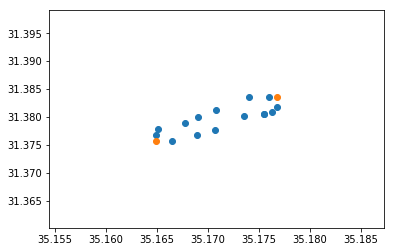

In [48]:
i = 45
coords = coords_list[i]
bounding_boxes = bounding_boxes_list[i]

plt.scatter(column(coords_list[i], 0), column(coords_list[i], 1))
plt.scatter([bounding_boxes[0], bounding_boxes[2]], 
            [bounding_boxes[1], bounding_boxes[3]])

In [32]:
from geopy.geocoders import Nominatim

def countries_from_bounding_boxes(bounding_boxes_list):
    geolocator = Nominatim()
    countries_list = []
    for bb in bounding_boxes_list:
        location1 = geolocator.reverse([bb[1], bb[0]], language='en')
#         location2 = geolocator.reverse(bb[2:4], language='en')
        countries_list.append(location1.address.split(',')[-1].lower()[1:])
    return countries_list


In [33]:
countries_list = countries_from_bounding_boxes(bounding_boxes_list)

In [37]:
project_ids = final_1[0]

In [38]:
data = pd.DataFrame({'id' : project_ids,
              'country' : countries_list,
              'coord_1': column(bounding_boxes_list, 0),
              'coord_2': column(bounding_boxes_list, 1),
              'coord_3': column(bounding_boxes_list, 2),
              'coord_4': column(bounding_boxes_list, 3)})

In [40]:
# data.to_csv('output/data_100validated.csv', float_format='%.15f')

# For label-maker

In [62]:
data = pd.read_csv('output/data_100validated.csv')

In [63]:
data

,Unnamed: 0,id,country,coord_1,coord_2,coord_3,coord_4
0,0,5405,tanzania,39.272457,-6.837614,39.275101,-6.835525
1,1,5397,tanzania,39.241958,-6.763698,39.246312,-6.759352
2,2,5370,tanzania,39.318241,-6.993321,39.331807,-6.977738
3,3,5027,tanzania,39.251924,-6.836261,39.272834,-6.818384
4,4,5021,tanzania,39.275785,-6.816047,39.286802,-6.797412
5,5,5011,tanzania,39.268302,-6.820121,39.280407,-6.811936
6,6,5006,senegal,-16.513630,15.970710,-16.508017,16.021120
7,7,4979,algeria,-8.061839,27.717790,-7.994367,27.757547
8,8,4909,upper nile,32.799296,12.359731,32.807212,12.379325
9,9,4857,uganda,32.161730,1.937611,32.174647,1.944859


In [46]:
def show_country_and_coords(i):
    d = data.iloc[i]
    print(d['id'], d['country'], d['coord_1'], d['coord_2'], d['coord_3'], d['coord_4'], sep=', ')

In [ ]:
show_country_and_coords(2)

## For Mapping Country Names

In [84]:
#Map the right names
import csv

with open('data/label-maker-country.csv', newline='') as csvfile:
    data_label_countries = list(csv.reader(csvfile))

    
data_osm_countries = list(set(data[:]['country']))
    
c = {}
for a in data_label_countries:
    for b in data_osm_countries:
        if b in a[0]:
            c[b] = a[0]

data['label_maker_country'] = data['country'].map(c)
data = data.dropna() #this will remove 40 validated projects (we can't determine the countries based on )

In [ ]:
data

In [ ]:
#data.to_csv('output/data_150_projects_with_valid_countries.csv')

##  Generate Multiple Configuration

In [94]:
data = pd.read_csv('output/data_150_projects_with_valid_countries.csv')
data

,Unnamed: 0,Unnamed: 0.1,id,country,coord_1,coord_2,coord_3,coord_4,label_maker_country
0,0,0,5405,tanzania,39.272457,-6.837614,39.275101,-6.835525,united_republic_of_tanzania
1,1,1,5397,tanzania,39.241958,-6.763698,39.246312,-6.759352,united_republic_of_tanzania
2,2,2,5370,tanzania,39.318241,-6.993321,39.331807,-6.977738,united_republic_of_tanzania
3,3,3,5027,tanzania,39.251924,-6.836261,39.272834,-6.818384,united_republic_of_tanzania
4,4,4,5021,tanzania,39.275785,-6.816047,39.286802,-6.797412,united_republic_of_tanzania
5,5,5,5011,tanzania,39.268302,-6.820121,39.280407,-6.811936,united_republic_of_tanzania
6,6,6,5006,senegal,-16.513630,15.970710,-16.508017,16.021120,senegal
7,7,7,4979,algeria,-8.061839,27.717790,-7.994367,27.757547,algeria
8,9,9,4857,uganda,32.161730,1.937611,32.174647,1.944859,uganda
9,13,13,4379,malawi,33.805785,-13.059429,34.005454,-12.814218,malawi


In [97]:
from string import Template
#open the template file
filein = open('template/template.txt')
src = Template(filein.read())

for index, row in data.iterrows():
    d = {'country_name': row['label_maker_country'],
         'zoom_level': 15, 
         'project_coordinates':",".join([str(row['coord_1']),str(row['coord_2']),str(row['coord_3']),str(row['coord_4'])])}
    fileName = 'configurations/config_'+ str(row['id']) + '.json'
    
    with open(fileName, 'w') as outputFile:
        outputFile.write(src.safe_substitute(d))

In [ ]:
from os import listdir
from os.path import isfile, join
configPath = 'configurations/'
dataPath = 'data/'
configFiles = [f for f in listdir(configPath) if isfile(join(configPath, f))]

counter = 1
for file in configFiles:
    !label-maker download -c {configPath+file}  -d {dataPath+str(counter)}
    !label-maker labels -c {configPath+file} -d {dataPath+str(counter)}
    !label-maker images -c {configPath+file} -d {dataPath+str(counter)}
    !label-maker package -c {configPath+file} -d {dataPath+str(counter)}
    counter = counter + 1

Saving QA tiles to data/1/united_republic_of_tanzania.mbtiles
   100%    343.6 MiB       8.2 MiB/s            0:00:00 ETA    
Retiling QA Tiles to zoom level 15 (takes a bit)
326679 features, 22244212 bytes of geometry, 2652 bytes of separate metadata, 5066357 bytes of string pool
  99.9%  15/19965/17010  
Determining labels for each tile
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 118 at 242 118
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b860> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 247 0 at 247 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 241 152 at 241 152
The operation 'GEOSIntersection_r

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 28 145 at 28 145
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 15 155 at 15 155
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a0fbda0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 9 169 at 9 169
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1123c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24 164 at 24 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 159 224 at 159 224
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 249 87 at 249 87
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1ccf98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 189 238 at 189 238
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112e10> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 189 at 118 189
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 91 0 at 91 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b23ffd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 63 24 at 63 24
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b198940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 67 at 0 67
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b198eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129 248 at 129 248
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geom

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 73 at 0 73
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1a1320> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 230 164 at 230 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b50bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 33 210 at 33 210
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1074e0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 246 173 at 246 173
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1c3320> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 126 93 at 126 93
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b402c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 98 84 at 98 84
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2dceb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 217 192 at 217 192
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b23ffd0> skipping
TopologyException: Input geom 0 is 

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 253 13 at 253 13
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2dcf98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 239 21 at 239 21
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2dcf98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 211 -2 at 211 -2
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112b00> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 132.66666666666666 38.333333333333336 at 132.66666666666666 38.333333333333336
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1075c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 210 -1 at 210 -1
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1075c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 157 176 at 157 176
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1079e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 196 at 224 196
The operation 'GEOSIntersection_r' could not b

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b473048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 88 56 at 88 56
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b805f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 123 9 at 123 9
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b805eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 30 at 118 30
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b805eb8> skipping
TopologyException: Input geom 0 is invalid: 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 50 37 at 50 37
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 56 163 at 56 163
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b805f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 25 106 at 25 106
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 46 83 at 46 83
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geome

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a10a2e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 244 100 at 244 100
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 130 49 at 130 49
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b473048> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3fb588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 247 110 at 247 110
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 57 at 136 57
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 220 204 at 220 204
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9bda90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 75 171 at 75 171
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 71 175 at 71 175
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 221 209 at 221 209
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba159e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 195 101 at 195 101
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3fb588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 255 at 242 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a10a2e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 125 at 191 125
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2a7748> skipping
TopologyException: Input geom 0 is

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 75 at 169 75
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9fe0f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 94 at 167 94
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 182 219 at 182 219
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1e7780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 185 67 at 185 67
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 113 120 at 113 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b364240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 123 96 at 123 96
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 222 47 at 222 47
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point -1 139 at -1 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 216 117 at 216 117
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9fe0f0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 223 118 at 223 118
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b381ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 215 123 at 215 123
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9fe0f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 230 83 at 230 83
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 62 72 at 62 72
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b168390> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 134 49 at 134 49
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7f6358> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 179 84 at 179 84
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b164550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 58 91 at 58 91
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 216 5 at 216 5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b476080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 109 at 248 109
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b164550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 205 143 at 205 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9c35f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 208 139 at 208 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 46 80 at 46 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49 80 at 49 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bab9240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 210 254 at 210 254
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 29 at 255 29
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 145 at 5 145
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 258 143 at 258 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7a9518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 245 110 at 245 110
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b75d860> skipping
TopologyException: Input geom 0 is inv

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 37 238 at 37 238
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3605c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 20 251 at 20 251
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8db198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 30 240 at 30 240
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 33 247 at 33 247
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 76 160 at 76 160
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8db198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 77 161 at 77 161
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b427c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 105 238 at 105 238
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b360e80> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 109 231 at 109 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 113.75 21.25 at 113.75 21.25
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1048ab5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 202 at 64 202
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8db198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 119 25 at 119 25
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0db860> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 173 218 at 173 218
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geome

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 252 219 at 252 219
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf4d6d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 33 at 169 33
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 226 234 at 226 234
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1d64a8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 139 68 at 139 68
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 123 146 at 123 146
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c26d668> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 215 109 at 215 109
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b761128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 238 65 at 238 65
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b427c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 239 65 at 239 65
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 144 47 at 144 47
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0db860> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 174 167 at 174 167
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8db198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 159 180 at 159 180
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b427c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 170 189 at 170 189
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 171 at 255 171
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b761128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 192 43 at 192 43
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b315828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 197 45 at 197 45
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9f1c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 200 217 at 200 217
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b315828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 179 255 at 179 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5c5240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 221 105 at 221 105
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba2d9e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 221 112 at 221 112
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9f1c18> skipping
TopologyException: Input geom 0 is

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10547eeb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 182 176 at 182 176
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9f1c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 185 161 at 185 161
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b315828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 95 70 at 95 70
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0b12e8> skipping
TopologyException: Input geom 0 is inv

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 150 at 224 150
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b315828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 174 165 at 174 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 174 at 224 174
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c8eb588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 113 176 at 113 176
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 6 46 at 6 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bbe0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 16 57 at 16 57
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 17 40 at 17 40
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b4e0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 79 54 at 79 54
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.po

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 5 88 at 5 88
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 10 82 at 10 82
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b4e0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 81 at 14 81
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 69 0 at 69 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 66 28 at 66 28
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bbe0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 66 28 at 66 28
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b4e0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 35 at 64 35
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28 46 at 28 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bc18> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10547eeb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49 50 at 49 50
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bcc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49 61 at 49 61
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10547eeb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 244 at 117 244
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8ee0b8> skipping
TopologyException: Input geom 0 is invalid

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 159 101 at 159 101
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1d62e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 41 163 at 41 163
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bf98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 171 75 at 171 75
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0db860> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 49 99 at 49 99
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 38 200 at 38 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123c88> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 47 133 at 47 133
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4cb940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 90 62 at 90 62
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5d5fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 20 37 at 20 37
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5d5fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 23 218 at 23 218
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a0fcb38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 67 93 at 67 93
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bcc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129 6 at 129 6
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c60c048> skipping
TopologyException: Input geom 0 is invalid: 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 181 24 at 181 24
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf3cc18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 56 at 118 56
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b51c9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 175 201 at 175 201
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1d62e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 249 24 at 249 24
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1540f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 95 242 at 95 242
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca394a8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 152 71 at 152 71
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c60c048> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 204 80 at 204 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123c88> skipping
TopologyException: Input geom 0 is 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24 244 at 24 244
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 203 112 at 203 112
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba22550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 29 244 at 29 244
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129.28571428571428 237.85714285714286 at 129.28571428571428 237.85714285714286
The operation 'GEOSIntersection_r' could not be 

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c60c048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 134 37 at 134 37
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b51c9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 181 at 93 181
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c4499b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 203 57 at 203 57
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf3cc18> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 233 232 at 233 232
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1054f0d68> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 225 249 at 225 249
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cc82048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 184 152 at 184 152
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b91e588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 112 186 at 112 186
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129 7 at 129 7
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be55438> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 192 71 at 192 71
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 153 125 at 153 125
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd9a5f8> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b51c9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 157 128 at 157 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba22550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 170 203 at 170 203
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b91e588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 159 218 at 159 218
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba22550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 3 at 255 3
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c60c048> skipping
TopologyException: Input geom 0 is inv

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 175 62 at 175 62
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a123748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 141 at 248 141
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b91ec88> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 71 at 169 71
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1049d4b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 72 at 169 72
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 236.5 218.5 at 236.5 218.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b835b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 42 at 201 42
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1049d4b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 51 at 213 51
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be55438> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 247 248 at 247 248
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometr

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 222 83 at 222 83
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be49940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 10.5 49.5 at 10.5 49.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 11 56 at 11 56
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 205 105 at 205 105
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 200 138 at 200 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bcc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 197 144 at 197 144
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be49940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 219 142 at 219 142
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bcc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 219 136 at 219 136
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 65 23 at 65 23
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c103be0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 83 4 at 83 4
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0b12e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 86 11 at 86 11
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 89 2 at 89 2
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.poly

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 253 at 0 253
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca381d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 8 252 at 8 252
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c3c1208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 81 244.5 at 81 244.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0b12e8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 95 243 at 95 243
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point -3 225 at -3 225
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 13 219 at 13 219
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b0f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 170 34 at 170 34
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb6d1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 91 0 at 91 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geome

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 82 206 at 82 206
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 81 207 at 81 207
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 80 210 at 80 210
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 196 1 at 196 1
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb6d1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 41 210 at 41 210
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb25198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 45 207 at 45 207
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb25160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 235 3 at 235 3
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0b12e8> skipping
TopologyException: Input geom 0 is invalid

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 209 251 at 209 251
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 203 89 at 203 89
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb6d1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 107 149 at 107 149
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb254a8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 114 139 at 114 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 111 235 at 111 235
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c4b1c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 99 241 at 99 241
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be56240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 140 at 191 140
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 192 158 at 192 158
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 196 120 at 196 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb25160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 205 119 at 205 119
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cf377f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 202 121 at 202 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be56240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 207 121 at 207 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 165 159 at 165 159
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb77828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 168 148 at 168 148
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2df940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 7 13 at 7 13
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 172.19999999999999 156.59999999999999 at 172.19999999999999 156.59999999999999
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bac8> skipping
The operation 'GEOSIntersection_r' could not 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 61 at 64 61
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 171 204 at 171 204
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb77828> skipping
TopologyException: Input geom 0 is invalid: Too few points in geometry component at or near point 178 194 at 178 194
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2df940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 16 at 118 16
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of th

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 254 at 118 254
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bbf0240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 199 159 at 199 159
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2df940> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 204 157 at 204 157
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb77828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 210 139 at 210 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geomet

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 11 131 at 11 131
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1af438> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 240 153 at 240 153
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2df940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 243 151 at 243 151
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cf377f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 247 153 at 247 153
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 121 12 at 121 12
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 231 at 201 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb77828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 234 at 201 234
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2df940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 126 16 at 126 16
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 255 72 at 255 72
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca460f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 27 135 at 27 135
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 26 138 at 26 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a106ba8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 19 17 at 19 17
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 52 195 at 52 195
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 7 19 at 7 19
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79f28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 54 211 at 54 211
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 17 10 at 17 10
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 144 57 at 144 57
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 67 at 5 67
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1af438> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79630> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 113 183.66666666666666 at 113 183.66666666666666
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a106ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 160 4 at 160 4
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity 

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49 81 at 49 81
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79e80> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 76 251 at 76 251
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 171 49 at 171 49
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea8d0> skipping
TopologyException: Input geom 0 is in

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 96 225 at 96 225
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b759da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 124 203 at 124 203
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0db860> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 90 21 at 90 21
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79e80> skipping
TopologyException: Input geom 0 is 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 190 7 at 190 7
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a106ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 233 at 21 233
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb1ab38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 189 61 at 189 61
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112710> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 210 31 at 210 31
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 10 165 at 10 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117.66666666666667 188 at 117.66666666666667 188
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6ce898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 6 174 at 6 174
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf7c208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 166 121 at 166 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 241 128 at 241 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b305ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 75.5 138.5 at 75.5 138.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1c9978> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 239 7 at 239 7
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b759da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 131 129 at 131 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 128 at 167 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b305ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 164 138 at 164 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 239 26 at 239 26
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 78 at 213 78
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 103 at 191 103
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd41c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 166 59 at 166 59
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79e80> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 201 98 at 201 98
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 73 at 248 73
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sh

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 249 119 at 249 119
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd41c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 199 9 at 199 9
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb79e80> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 128 141 at 128 141
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 219 131 at 219 131
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1af438> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 234 166 at 234 166
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 236 171 at 236 171
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b305ba8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 162 179 at 162 179
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b759da0> skipping
TopologyException: Input geom

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 165 164 at 165 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd380b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 138 249 at 138 249
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 223 65 at 223 65
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf7c208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 215 229 at 215 229
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd380b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 153 212 at 153 212
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a139e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 214 255 at 214 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d411f28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 234 126 at 234 126
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab00> skipping
TopologyException: Input geom 0 is

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 166 250 at 166 250
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c900898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 174 249 at 174 249
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb1ab38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 179 236 at 179 236
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c900898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 2 36 at 2 36
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 43 53 at 43 53
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bbe0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 47 59 at 47 59
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 249 252 at 249 252
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a112240> skipping
TopologyException: Input geom 0 is invalid

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 232 191 at 232 191
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bd380b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 233.33333333333334 193.66666666666666 at 233.33333333333334 193.66666666666666
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8ef780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 141 255 at 141 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bdf25c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 141 255 at 141 255
The operation 'GEOSIntersection_r' could not

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 100 42 at 100 42
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a127e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 146 207 at 146 207
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b7b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 107 46 at 107 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b398a20> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 105 57 at 105 57
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 253.5 249.5 at 253.5 249.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1680f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 15 162 at 15 162
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcc58d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 12 168 at 12 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b398a20> skipping
TopologyException: Input geom 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 231 at 14 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcc58d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 86 26 at 86 26
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca90748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 236 at 21 236
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b398a20> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24 225 at 24 225
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 125 212 at 125 212
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 103 229 at 103 229
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcc58d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 163 114 at 163 114
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca90668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 170 119 at 170 119
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 173 138 at 173 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca90668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 76 48 at 76 48
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 188 129 at 188 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ca90748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 125 62 at 125 62
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 46 158 at 46 158
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b142d68> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 52 139 at 52 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 52 150 at 52 150
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b142d68> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 71 220 at 71 220
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 22 214 at 22 214
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 223 at 21 223
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3c7630> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 203 145 at 203 145
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 208 144 at 208 144
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 11 234 at 11 234
The operatio

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 95 256 at 95 256
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a7862b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 62 68 at 62 68
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14be48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 50 84 at 50 84
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 94 154 at 94 154
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 207 138 at 207 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7d4b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 214 148 at 214 148
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b579a90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 195 159 at 195 159
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b20a2b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 193 182 at 193 182
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 181.42857142857142 36.428571428571431 at 181.42857142857142 36.428571428571431
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3c7630> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 189 32 at 189 32
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1233c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 139 85 at 139 85
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3c7630> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 138 88 at 138 88
The operation 'GEOSIntersection_r' could not 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 140 131 at 140 131
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1048ab5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 207 15 at 207 15
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b2d4550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 193 16.75 at 193 16.75
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f96d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 158 128 at 158 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 234 52 at 234 52
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14be48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 168 192 at 168 192
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1048ab5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 46 at 242 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c7c70f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 150.5 233.5 at 150.5 233.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28 233 at 28 233
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bc50> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 51 45 at 51 45
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a6b27f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 249 132 at 249 132
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 244 156 at 244 156
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sh

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 223 145 at 223 145
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c7c70f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 30 33 at 30 33
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b390> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 252 128 at 252 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f96d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 200 219 at 200 219
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 215 221 at 215 221
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3e52e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 3.75 100 at 3.75 100
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eac88> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 254 68 at 254 68
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d772e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 120 at 5 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a6b27f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 67.666666666666671 36 at 67.666666666666671 36
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b982518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 68 37 at 68 37
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eac88> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 100 32 at 100 32
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a6b27f0> skipping
TopologyExce

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 183 255 at 183 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bc556d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 40 15 at 40 15
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b11b048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 116 80 at 116 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b982518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 189 257 at 189 257
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 20 173 at 20 173
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eaac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 110 149 at 110 149
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0eab38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 22 173 at 22 173
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a7bcac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 175 at 21 175
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b11b1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 82 237 at 82 237
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 84 245 at 84 245
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bfc1ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 240 at 93 240
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0668> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 105 231 at 105 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c28a198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 96 132 at 96 132
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b11b198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 122 137 at 122 137
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b11b198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 134 5 at 134 5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 163 213 at 163 213
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a0668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 135 80 at 135 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c28a198> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 142 122 at 142 122
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b1c8e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 158 70 at 158 70
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 75 120 at 75 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bf44d30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 29 255 at 29 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bfc1ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 197 84 at 197 84
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8baf28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 105 120 at 105 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 180 171 at 180 171
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcb2f98> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c28a198> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 182 176 at 182 176
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8baf28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 196 130 at 196 130
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be0d3c8> skipping
TopologyException: Input geom

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 249 205 at 249 205
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c28a198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 250 147 at 250 147
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a7866d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 260 at 21 260
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be0d3c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 235 168 at 235 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 11 189 at 11 189
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb3c5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 32 129 at 32 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb3c5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 41 143 at 41 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb3c630> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 46 136 at 46 136
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 48 35 at 48 35
TopologyException: Input geom 0 is invalid: Self-intersection at or near point -5 215 at -5 215
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb4aa58> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0a05f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 48 177 at 48 177
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb3c630> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 48 182 at 48 182
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a127f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 245 at 0 245
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb3c5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 57 203 at 57 203
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a127668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 120 245 at 120 245
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b160> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 90 190 at 90 190
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a127f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 66 49 at 66 49
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb4a0f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 32 245 at 32 245
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c770128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 94 188 at 94 188
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 112 71 at 112 71
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb4a0f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 76 150 at 76 150
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb20518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 125 108 at 125 108
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bb4a0f0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 74 155 at 74 155
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sh

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 245 106 at 245 106
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a127668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 174 at 5 174
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e195b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 71 229 at 71 229
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c770128> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 79 235 at 79 235
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry 

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb26ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 196 at 0 196
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14ba58> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 53 255 at 53 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8a3f28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 165 91 at 165 91
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 245 at 0 245
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geome

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 225 31 at 225 31
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10cb26ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24.333333333333332 -0.66666666666666663 at 24.333333333333332 -0.66666666666666663
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a1230f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 162 231 at 162 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c105f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 244 at 0 244
The operation 'GEOSIntersection_r' could not b

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 18 91 at 18 91
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14bba8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 120 137 at 120 137
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d941278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 106 at 64 106
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b0ea9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 177 at 0 177
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 182 47 at 182 47
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14be48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 42 209 at 42 209
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bccbf28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 100 at 191 100
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14b668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 198 100 at 198 100
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 180 at 191 180
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d9413c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 113.59999999999999 119.40000000000001 at 113.59999999999999 119.40000000000001
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8a3b00> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 119 121 at 119 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8a3d30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24.333333333333332 254.33333333333334 at 24.33333333333333

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 197 209 at 197 209
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c328ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 214 62 at 214 62
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8af668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 199 232 at 199 232
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c328c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 194 237 at 194 237
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 117 at 136 117
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 85 103 at 85 103
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b448f60> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bc57f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 174.66666666666666 27.666666666666668 at 174.66666666666666 27.666666666666668
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcab518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 88 126 at 88 126
The operation 'GEOSIntersection_r' could not be 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 230 104 at 230 104
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bc57860> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 38 192 at 38 192
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b448fd0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 45 202 at 45 202
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b448cf8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 40 26 at 40 26
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 184 194 at 184 194
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 185 222 at 185 222
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b168198> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba42278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 29 107 at 29 107
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10be7a978> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 252 at 213 252
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 226 195 at 226 195
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b351588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 15 at 93 15
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c067780> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 228 216 at 228 216
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b596128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 234 217 at 234 217
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 40 220 at 40 220
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a7a8cf8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 41 222 at 41 222
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a135588> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 231 at 21 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9b6908> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 94 164 at 94 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129 139 at 129 139
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b17a518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 68 152 at 68 152
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8da2b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 143 143 at 143 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b3b2390> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 133 174 at 133 174
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 79 239 at 79 239
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b14ba90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 175 164 at 175 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9b68d0> skipping
---
Roads: 134 tiles
Buildings: 133 tiles
Total tiles: 144
Writing out labels to data/1/labels.npz
Writing 19950-17005-15.png
Writing 19950-17009-15.png
Writing 19950-17012-15.png
Writing 19950-17011-15.png
Writing 19951-17005-15.png
Writing 19950-17008-15.png
Writing 19950-17006-15.png
Writing 19950-17010-15.png
Writing 19950-17007-15.png
Writing 19952-17005-15.png
Writing 19951-17012-15.png
Writing 19951-17011-15.png
Writing 19951-17009-15.png
Writing 19951-17008-

Writing 19590-17932-15.png
Writing 19590-17925-15.png
Writing 19590-17933-15.png
Writing 19590-17926-15.png
Writing 19590-17936-15.png
Writing 19589-17928-15.png
Writing 19590-17941-15.png
Writing 19590-17942-15.png
Writing 19590-17931-15.png
Writing 19591-17923-15.png
Writing 19590-17935-15.png
Writing 19589-17929-15.png
Writing 19591-17928-15.png
Writing 19591-17926-15.png
Writing 19591-17929-15.png
Writing 19591-17930-15.png
Writing 19591-17927-15.png
Writing 19591-17934-15.png
Writing 19591-17933-15.png
Writing 19591-17932-15.png
Writing 19591-17941-15.png
Writing 19591-17942-15.png
Writing 19591-17944-15.png
Writing 19590-17924-15.png
Writing 19592-17925-15.png
Writing 19591-17935-15.png
Writing 19592-17924-15.png
Writing 19592-17928-15.png
Writing 19592-17929-15.png
Writing 19592-17931-15.png
Writing 19592-17933-15.png
Writing 19592-17935-15.png
Writing 19592-17927-15.png
Writing 19592-17934-15.png
Writing 19592-17937-15.png
Writing 19592-17938-15.png
Writing 19592-17944-15.png
W

Writing 19617-16411-15.png
Writing 19618-16411-15.png
Saving packaged file to data/4/data.npz
Saving QA tiles to data/5/zambia.mbtiles
   100%     91.6 MiB      11.0 MiB/s            0:00:00 ETA    
Retiling QA Tiles to zoom level 15 (takes a bit)
221 features, 11773 bytes of geometry, 8 bytes of separate metadata, 4342 bytes of string pool
  99.9%  15/18538/17753  
Determining labels for each tile
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 78 at 248 78
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x110fcf048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 127 182 at 127 182
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x110fcd160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or 

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x105861eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 150 99 at 150 99
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4ce898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 109 64 at 109 64
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b53a198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 32 69 at 32 69
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b538780> skipping
TopologyException: Input geom 0 is invalid

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 81 at 224 81
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b54d6d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 226 93 at 226 93
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5f7518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 211 79 at 211 79
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4ce940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 251 136 at 251 136
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 153 153 at 153 153
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5394a8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 163 179 at 163 179
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e860> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 80 at 64 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b538c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 92 86 at 92 86
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 232 at 93 232
The operati

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 132 243 at 132 243
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5394a8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 252 153 at 252 153
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b539080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 6 165 at 6 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e5f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 35 179 at 35 179
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 144 131 at 144 131
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1049715f8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 193 195 at 193 195
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b560f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 130 168 at 130 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4dd080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 49 -2 at 49 -2
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 98 63 at 98 63
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4e44e0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 129 at 255 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b54fa58> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 118 101 at 118 101
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9797b8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 253 155 at 253 155
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 204 106 at 204 106
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b539278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 129 3 at 129 3
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7045c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 188 121 at 188 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b53b4a8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 190 155 at 190 155
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 63 216 at 63 216
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 195 138 at 195 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4ceb00> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6ef2b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 204 183 at 204 183
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6f7d30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 68 at 255 68
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 157 88 at 157 88
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7d0198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 64 at 201 64
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8043c8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 168 111 at 168 111
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7d0198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 110 64 at 110 64
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sh

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 111 97 at 111 97
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8f0208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 207 at 213 207
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4ce940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 83 148 at 83 148
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4e5518> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 225 251 at 225 251
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b80e7b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 27 210 at 27 210
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba34da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 48 202 at 48 202
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba48ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 10 at 242 10
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b80eb00> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 200 134 at 200 134
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7f8748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 227 122 at 227 122
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6896a0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 187 213 at 187 213
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4e8748> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 148 163 at 148 163
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geomet

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 62 84 at 62 84
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b80ee10> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 45 111 at 45 111
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b80ee10> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 85 242 at 85 242
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b754278> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 41 128 at 41 128
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 68 171 at 68 171
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5382b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 190 183 at 190 183
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b80e7b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 198 146 at 198 146
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4932e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 194 at 167 194
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 60 74 at 60 74
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52eb70> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 155 209 at 155 209
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bc92780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 95 40 at 95 40
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 109 36 at 109 36
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 68 108 at 68 108
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b54ea90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 69 210 at 69 210
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b540ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 46 190 at 46 190
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6d04a8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 91 150 at 91 150
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 81 162 at 81 162
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6a31d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 91 65 at 91 65
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 109 231 at 109 231
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6a3160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 108 112 at 108 112
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 221 130 at 221 130
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6a31d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 132 28 at 132 28
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b655ef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 134 32 at 134 32
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b655da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 143 142 at 143 142
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 237 at 136 237
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b734080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 154 246 at 154 246
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b655fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 144 241 at 144 241
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b734080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 15 at 224 15
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 40 147 at 40 147
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b65a550> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 182 at 167 182
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4ce8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 151 112 at 151 112
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5b9c50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 189 186 at 189 186
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 24 90 at 24 90
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4e1eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 39 86 at 39 86
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b809828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 88 18 at 88 18
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4e1eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 18 221 at 18 221
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 31 181 at 31 181
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b53a1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 50 148 at 50 148
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 137 235 at 137 235
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a4ebf98> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b53a1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 30 115 at 30 115
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 73 at 136 73
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9a0a20> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 231 4 at 231 4
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1049715f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 150 98 at 150 98
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5115f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 155 102 at 155 102
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28 198 at 28 198
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b482fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 246 256 at 246 256
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5115f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 255 at 136 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b85f048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 243 184 at 243 184
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 33 203 at 33 203
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c08c128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 62 168 at 62 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6b8d68> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 101 96 at 101 96
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bc1c9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 85 218 at 85 218
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 121 248 at 121 248
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b585828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 240 28 at 240 28
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b656c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 56 1 at 56 1
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ba16e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 9 13 at 9 13
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 222 70 at 222 70
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7b0400> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 22 12 at 22 12
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b58cf28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 107 44 at 107 44
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b715fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 115 40 at 115 40
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 170 24 at 170 24
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b624a90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 125 190 at 125 190
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b715e80> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 67 206 at 67 206
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b715c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 200 at 169 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b715dd8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 0 at 117 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b74c048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 97 41 at 97 41
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1058d4cc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 255 at 117 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5384e0> skipping
TopologyException: Input geom 0 is invalid

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b90f470> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 220 200 at 220 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1058d4cc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 200 235 at 200 235
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b74c048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 235 141 at 235 141
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9315f8> skipping
TopologyException: Input geom 0 is

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 67 134 at 67 134
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b662f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 74 138 at 74 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b662ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 138 at 93 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b662f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 85 143 at 85 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 131 211 at 131 211
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8c06d8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 31 36 at 31 36
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b480710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 159 at 167 159
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b662ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 169 179 at 169 179
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x105861eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 15 234 at 15 234
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b480710> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 90 113 at 90 113
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x104dd6a90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 220 257 at 220 257
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b662b70> skipping
TopologyException: Input geom 0 is inv

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 206 183 at 206 183
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c1e28d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 146 at 14 146
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6ac9e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 90 78 at 90 78
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bbb0240> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 250 159 at 250 159
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 100 124 at 100 124
The ope

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 85 222 at 85 222
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b785eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 36 57 at 36 57
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 57 60 at 57 60
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 18 88 at 18 88
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 108 185 at 108 185
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e7f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 84 244 at 84 244
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e7f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 214 164 at 214 164
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 127 201 at 127 201
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6d09b0> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 53 129 at 53 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9450b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 133 146 at 133 146
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a518940> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 150 157 at 150 157
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c18def0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 153 151 at 153 151
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 112 -2 at 112 -2
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8bc048> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 28 27 at 28 27
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c08cf98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 54 at 248 54
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6f1668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 191 127 at 191 127
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 146 78 at 146 78
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f2080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 38 210 at 38 210
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 31 81 at 31 81
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c08c860> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bac9e10> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 28 94 at 28 94
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 66 10 at 66 10
The operatio

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 134 at 255 134
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52ef60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 127 255 at 127 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6caa20> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 19.899999999999999 170.09999999999999 at 19.899999999999999 170.09999999999999
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bac9e10> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 34 146 at 34 146
The operation 'GEOSIntersection_r' could 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 228 247 at 228 247
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b8ba0f0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 215 61 at 215 61
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5baef0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 153 241 at 153 241
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6caa20> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 171 129 at 171 129
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 36 87 at 36 87
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6a35c0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 44 86 at 44 86
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b6a33c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 115 95 at 115 95
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10aa95780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 120 92 at 120 92
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geome

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 88 168 at 88 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a518b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 118 at 242 118
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b7faf60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 105 136 at 105 136
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x105861eb8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 196 254 at 196 254
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 126 143 at 126 143
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b736668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 81 181 at 81 181
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bbde080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 157 96 at 157 96
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b71b080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 139.125 229.75 at 139.125 229.75
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 215 156 at 215 156
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bcb8ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 6 46 at 6 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10baa63c8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 220.66666666666666 165 at 220.66666666666666 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a518b38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 210 0 at 210 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidit

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 151 141 at 151 141
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b736668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 153 138 at 153 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b70eba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 147 153.5 at 147 153.5
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10a510ba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 224 150 at 224 150
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 10 43 at 10 43
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5df160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 13 46 at 13 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b5df208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 126 0 at 126 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c798a90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 16 7 at 16 7
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.po

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 18 168 at 18 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bbe6f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 199 123 at 199 123
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 19 174 at 19 174
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9e8748> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10bbe6fd0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21 170 at 21 170
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 106 156 at 106 156
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f2048> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 39 46 at 39 46
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b9f49e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 120 166 at 120 166
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f2198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 9 21 at 9 21
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 179 257 at 179 257
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b52e9b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 128 158 at 128 158
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10b4f20b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 175 at 255 175
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c156240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 35 239 at 35 239
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

Writing 19942-17011-15.png
Writing 19942-17012-15.png
Writing 19942-17009-15.png
Writing 19942-17013-15.png
Writing 19941-17003-15.png
Writing 19942-17010-15.png
Writing 19942-17005-15.png
Writing 19942-17015-15.png
Writing 19942-17004-15.png
Writing 19942-17002-15.png
Writing 19942-17016-15.png
Writing 19943-17007-15.png
Writing 19942-17003-15.png
Writing 19943-17008-15.png
Writing 19943-17010-15.png
Writing 19943-17011-15.png
Writing 19943-17012-15.png
Writing 19943-17009-15.png
Writing 19943-17001-15.png
Writing 19943-17013-15.png
Writing 19943-17014-15.png
Writing 19943-17015-15.png
Writing 19943-17006-15.png
Writing 19943-17002-15.png
Writing 19943-17016-15.png
Writing 19943-17004-15.png
Writing 19943-17003-15.png
Writing 19943-17005-15.png
Writing 19944-17001-15.png
Writing 19944-17008-15.png
Writing 19944-17010-15.png
Writing 19944-17009-15.png
Writing 19944-17007-15.png
Writing 19944-17011-15.png
Writing 19944-17006-15.png
Writing 19944-17005-15.png
Writing 19944-17003-15.png
W

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 223 34 at 223 34
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cdb38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 8 191 at 8 191
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cd630> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 6 250 at 6 250
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cdac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 202 at 255 202
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapel

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 147 251 at 147 251
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cddd8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 197 222 at 197 222
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cddd8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 193 189 at 193 189
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8cd8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 157 101 at 157 101
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geomet

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 0 at 14 0
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e9b0f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 58 183 at 58 183
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7a42b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 40 218 at 40 218
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7a42b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 34 209 at 34 209
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geome

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 238 147 at 238 147
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8215f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 160 68 at 160 68
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d1080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 72 at 167 72
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d10f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 172 71 at 172 71
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e9b09e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 51 62 at 51 62
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e9b0ac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 167 182 at 167 182
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d1160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 178 168 at 178 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d1128> skipping
TopologyException: Input geom 0 is inv

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 160 98 at 160 98
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7c3278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 21.333333333333332 118 at 21.333333333333332 118
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7da208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 187 115 at 187 115
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7c30f0> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 209 90 at 209 90
The operation 'GEOSIntersection_r' could not be performed. Likely cause i

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 34 99 at 34 99
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d2c88> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 193 66 at 193 66
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e86cb38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 64 17 at 64 17
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7c8cc0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point -2 224 at -2 224
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 190 205 at 190 205
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d1080> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 30 120 at 30 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7c81d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 112 at 201 112
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10eb13ac8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 148 255 at 148 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 4 76 at 4 76
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e86ca58> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 215 97 at 215 97
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ea2d048> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 87 49 at 87 49
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e821668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 45 250 at 45 250
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometr

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 240 70 at 240 70
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10ea2d128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 189 185 at 189 185
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10e8215f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 140 at 117 140
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10d7d58d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 223 223 at 223 223
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

Writing 19452-17227-15.png
Writing 19452-17237-15.png
Writing 19452-17240-15.png
Writing 19452-17241-15.png
Writing 19452-17226-15.png
Writing 19452-17247-15.png
Writing 19452-17251-15.png
Writing 19452-17252-15.png
Writing 19453-17207-15.png
Writing 19453-17206-15.png
Writing 19453-17217-15.png
Writing 19452-17234-15.png
Writing 19453-17218-15.png
Writing 19452-17239-15.png
Writing 19452-17242-15.png
Writing 19452-17243-15.png
Writing 19453-17224-15.png
Writing 19453-17222-15.png
Writing 19453-17228-15.png
Writing 19452-17225-15.png
Writing 19453-17232-15.png
Writing 19453-17230-15.png
Writing 19453-17225-15.png
Writing 19453-17233-15.png
Writing 19453-17231-15.png
Writing 19453-17226-15.png
Writing 19453-17229-15.png
Writing 19453-17238-15.png
Writing 19453-17223-15.png
Writing 19453-17227-15.png
Writing 19453-17237-15.png
Writing 19453-17236-15.png
Writing 19453-17244-15.png
Writing 19453-17245-15.png
Writing 19453-17246-15.png
Writing 19453-17235-15.png
Writing 19453-17251-15.png
W

Writing 19460-17239-15.png
Writing 19461-17220-15.png
Writing 19461-17219-15.png
Writing 19461-17221-15.png
Writing 19461-17229-15.png
Writing 19461-17224-15.png
Writing 19461-17225-15.png
Writing 19461-17226-15.png
Writing 19461-17223-15.png
Writing 19461-17222-15.png
Writing 19461-17232-15.png
Writing 19461-17233-15.png
Writing 19461-17230-15.png
Writing 19461-17236-15.png
Writing 19461-17235-15.png
Writing 19461-17238-15.png
Writing 19461-17239-15.png
Writing 19461-17217-15.png
Writing 19461-17243-15.png
Writing 19461-17237-15.png
Writing 19461-17234-15.png
Writing 19461-17240-15.png
Writing 19461-17245-15.png
Writing 19461-17241-15.png
Writing 19461-17244-15.png
Writing 19461-17247-15.png
Writing 19461-17242-15.png
Writing 19461-17249-15.png
Writing 19461-17246-15.png
Writing 19462-17206-15.png
Writing 19462-17207-15.png
Writing 19462-17209-15.png
Writing 19462-17210-15.png
Writing 19462-17215-15.png
Writing 19462-17216-15.png
Writing 19461-17218-15.png
Writing 19461-17248-15.png
W

Writing 19469-17234-15.png
Writing 19469-17235-15.png
Writing 19469-17237-15.png
Writing 19469-17232-15.png
Writing 19469-17241-15.png
Writing 19469-17242-15.png
Writing 19469-17239-15.png
Writing 19469-17236-15.png
Writing 19469-17240-15.png
Writing 19469-17243-15.png
Writing 19469-17245-15.png
Writing 19469-17238-15.png
Writing 19469-17244-15.png
Writing 19469-17250-15.png
Writing 19469-17251-15.png
Writing 19469-17252-15.png
Writing 19469-17233-15.png
Writing 19470-17206-15.png
Writing 19470-17207-15.png
Writing 19470-17209-15.png
Writing 19470-17208-15.png
Writing 19470-17210-15.png
Writing 19470-17211-15.png
Writing 19470-17215-15.png
Writing 19470-17217-15.png
Writing 19470-17218-15.png
Writing 19470-17219-15.png
Writing 19470-17221-15.png
Writing 19470-17214-15.png
Writing 19469-17249-15.png
Writing 19470-17230-15.png
Writing 19469-17247-15.png
Writing 19469-17248-15.png
Writing 19470-17231-15.png
Writing 19470-17224-15.png
Writing 19469-17246-15.png
Writing 19470-17223-15.png
W

Writing 19455-17218-15.png
Writing 19455-17233-15.png
Writing 19455-17245-15.png
Writing 19455-17249-15.png
Writing 19455-17250-15.png
Writing 19455-17251-15.png
Writing 19456-17206-15.png
Writing 19456-17209-15.png
Writing 19456-17210-15.png
Writing 19456-17211-15.png
Writing 19456-17212-15.png
Writing 19456-17213-15.png
Writing 19456-17214-15.png
Writing 19456-17215-15.png
Writing 19456-17216-15.png
Writing 19456-17217-15.png
Writing 19456-17218-15.png
Writing 19456-17219-15.png
Writing 19456-17232-15.png
Writing 19456-17233-15.png
Writing 19456-17247-15.png
Writing 19456-17248-15.png
Writing 19456-17249-15.png
Writing 19456-17250-15.png
Writing 19457-17207-15.png
Writing 19457-17210-15.png
Writing 19457-17212-15.png
Writing 19457-17213-15.png
Writing 19457-17214-15.png
Writing 19457-17248-15.png
Writing 19457-17249-15.png
Writing 19458-17210-15.png
Writing 19458-17211-15.png
Writing 19458-17212-15.png
Writing 19458-17213-15.png
Writing 19458-17214-15.png
Writing 19458-17216-15.png
W

25100 features, 1618306 bytes of geometry, 259 bytes of separate metadata, 399669 bytes of string pool
  99.9%  15/18951/17804  
Determining labels for each tile
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 144 67 at 144 67
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d2bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 180 99 at 180 99
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d2bd30> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 219 108 at 219 108
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d57fd0> skipping
TopologyException: Input geom 0 is invalid: 

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 82 51 at 82 51
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d5a278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 121 30 at 121 30
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d5aa58> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 120 63 at 120 63
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d5a9e8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 179 101 at 179 101
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shap

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 50 27 at 50 27
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x111d12160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 52 26 at 52 26
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x111d12160> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point -1 201 at -1 201
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112d7a390> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 6 1 at 6 1
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.po

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 251 161 at 251 161
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1133a7d68> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 26 80 at 26 80
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddbc50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 29 81 at 29 81
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddbc18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 250 192 at 250 192
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 11 at 117 11
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddbc50> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 123 14 at 123 14
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddbb70> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 117 19 at 117 19
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddbc18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 141 at 5 141
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 143 2 at 143 2
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11374e2e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 151 12 at 151 12
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113735240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 155 14 at 155 14
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1131b8e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 194 at 14 194
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geo

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11374e2e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 235 8 at 235 8
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1131b8e48> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 236 21 at 236 21
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113735240> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 93 212 at 93 212
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112ddb4a8> skipping
TopologyException: Input geom 0 is invalid

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c5c8da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 70 165 at 70 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c5b99b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 70 181 at 70 181
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112e327f0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 254 37 at 254 37
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1134ccd30> skipping
TopologyException: Input geom 0 is inval

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 199 243 at 199 243
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112dd3f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 201 243 at 201 243
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c5c8da0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 192 100 at 192 100
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c5b99e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 220 240 at 220 240
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 227 183 at 227 183
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x10c5b99e8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 239 172 at 239 172
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1137842b0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 244 169 at 244 169
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11313c1d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 248 166 at 248 166
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

---
Roads: 4 tiles
Buildings: 4 tiles
Total tiles: 4
Writing out labels to data/10/labels.npz
Writing 15314-15206-15.png
Writing 15313-15206-15.png
Writing 15313-15205-15.png
Writing 15314-15205-15.png
Saving packaged file to data/10/data.npz
Saving QA tiles to data/11/united_republic_of_tanzania.mbtiles
   100%    343.6 MiB      11.5 MiB/s            0:00:00 ETA    
Retiling QA Tiles to zoom level 15 (takes a bit)
60364 features, 3547398 bytes of geometry, 3846 bytes of separate metadata, 785360 bytes of string pool
  99.9%  15/19269/16847  
Determining labels for each tile
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 102 127 at 102 127
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113efd8d0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 56 88 at 56 88
The operation 'GEOSIntersection_r' could not be performed.

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 244 191 at 244 191
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f5e978> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 202 223 at 202 223
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f5e828> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 13 51 at 13 51
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f1c6a0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136.66666666666666 117.66666666666667 at 136.66666666666666 117.66666666666667
The operation 'GEOSIntersection_r' could not be 

TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 251 230 at 251 230
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f415f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 235 163 at 235 163
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f5eb38> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 108 125 at 108 125
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f1c4a8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 218 63 at 218 63
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 92 156 at 92 156
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f0f278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 80 164 at 80 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f0f278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 91 162 at 91 162
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f0f278> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 88 164 at 88 164
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 225 120 at 225 120
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f5ea90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 123 111 at 123 111
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11410af28> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 134 168 at 134 168
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f5ea58> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 137 160 at 137 160
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <s

The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f415f8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 233 165 at 233 165
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f23c18> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 237 121 at 237 121
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1145a2f98> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 245 222 at 245 222
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113efdc88> skipping
TopologyException: Input geom 0 is

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 212 33 at 212 33
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11406fba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 238 19 at 238 19
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11406fba8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 136 114 at 136 114
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f3e0b8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 196 12 at 196 12
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 0 123 at 0 123
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f415f8> skipping
TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 113 255 at 113 255
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x114166e10> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 152 131 at 152 131
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 14 118 at 14 118
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113eb8fd0> skipping
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sh

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 230 8 at 230 8
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1140446a0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 196 at 213 196
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x114118668> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 213 200 at 213 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f3eef0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 216 191 at 216 191
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 166 100 at 166 100
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1141f2898> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 242 130 at 242 130
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x114355208> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 77 138 at 77 138
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f44128> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 77 140 at 77 140
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shape

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 143 254 at 143 254
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1134c4780> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 162 200 at 162 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1140b2390> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 255 88 at 255 88
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1143d6a90> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 164 229 at 164 229
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <sha

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 211 200 at 211 200
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f32198> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 241 219 at 241 219
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f22dd8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 75 76 at 75 76
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f41be0> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 190 1 at 190 1
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 78 133 at 78 133
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x113f68cf8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 80 181 at 80 181
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x112f39cf8> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 103 133 at 103 133
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x114511f60> skipping
TopologyException: Input geom 0 is invalid: Self-intersection at or near point 114 6 at 114 6
The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.g

Writing 19228-16851-15.png
Writing 19229-16848-15.png
Writing 19229-16846-15.png
Writing 19228-16854-15.png
Writing 19229-16849-15.png
Writing 19228-16852-15.png
Writing 19228-16855-15.png
Writing 19229-16847-15.png
Writing 19229-16851-15.png
Writing 19228-16853-15.png
Writing 19230-16847-15.png
Writing 19229-16852-15.png
Writing 19229-16853-15.png
Writing 19230-16848-15.png
Writing 19230-16849-15.png
Writing 19229-16854-15.png
Writing 19230-16846-15.png
Writing 19230-16852-15.png
Writing 19230-16850-15.png
Writing 19230-16851-15.png
Writing 19229-16850-15.png
Writing 19231-16846-15.png
Writing 19230-16853-15.png
Writing 19230-16855-15.png
Writing 19230-16854-15.png
Writing 19231-16850-15.png
Writing 19231-16849-15.png
Writing 19231-16852-15.png
Writing 19231-16851-15.png
Writing 19232-16846-15.png
Writing 19231-16853-15.png
Writing 19231-16854-15.png
Writing 19231-16855-15.png
Writing 19232-16847-15.png
Writing 19232-16851-15.png
Writing 19231-16847-15.png
Writing 19231-16848-15.png
W

Writing 19259-16852-15.png
Writing 19261-16849-15.png
Writing 19260-16852-15.png
Writing 19260-16853-15.png
Writing 19260-16849-15.png
Writing 19261-16850-15.png
Writing 19261-16848-15.png
Writing 19261-16847-15.png
Writing 19262-16846-15.png
Writing 19261-16851-15.png
Writing 19261-16852-15.png
Writing 19261-16853-15.png
Writing 19262-16847-15.png
Writing 19261-16854-15.png
Writing 19262-16849-15.png
Writing 19262-16848-15.png
Writing 19262-16852-15.png
Writing 19263-16846-15.png
Writing 19262-16855-15.png
Writing 19263-16848-15.png
Writing 19262-16851-15.png
Writing 19262-16850-15.png
Writing 19263-16849-15.png
Writing 19263-16850-15.png
Writing 19263-16847-15.png
Writing 19262-16853-15.png
Writing 19263-16853-15.png
Writing 19264-16846-15.png
Writing 19263-16851-15.png
Writing 19263-16855-15.png
Writing 19263-16852-15.png
Writing 19263-16854-15.png
Writing 19264-16848-15.png
Writing 19264-16847-15.png
Writing 19264-16850-15.png
Writing 19264-16849-15.png
Writing 19265-16846-15.png
W

Writing 19294-16848-15.png
Writing 19295-16854-15.png
Writing 19295-16846-15.png
Writing 19295-16855-15.png
Writing 19296-16848-15.png
Writing 19296-16846-15.png
Writing 19296-16847-15.png
Writing 19295-16847-15.png
Writing 19295-16853-15.png
Writing 19296-16852-15.png
Writing 19296-16854-15.png
Writing 19296-16849-15.png
Writing 19296-16853-15.png
Writing 19297-16846-15.png
Writing 19295-16851-15.png
Writing 19296-16850-15.png
Writing 19296-16855-15.png
Writing 19297-16848-15.png
Writing 19297-16847-15.png
Writing 19297-16852-15.png
Writing 19297-16849-15.png
Writing 19297-16853-15.png
Writing 19295-16850-15.png
Writing 19298-16849-15.png
Writing 19297-16854-15.png
Writing 19298-16848-15.png
Writing 19297-16850-15.png
Writing 19298-16852-15.png
Writing 19298-16851-15.png
Writing 19298-16854-15.png
Writing 19294-16850-15.png
Writing 19299-16847-15.png
Writing 19296-16851-15.png
Writing 19297-16855-15.png
Writing 19299-16848-15.png
Writing 19299-16853-15.png
Writing 19299-16854-15.png
W

Writing 19327-16851-15.png
Writing 19323-16853-15.png
Writing 19328-16846-15.png
Writing 19327-16854-15.png
Writing 19327-16852-15.png
Writing 19326-16848-15.png
Writing 19328-16847-15.png
Writing 19328-16851-15.png
Writing 19328-16848-15.png
Writing 19328-16849-15.png
Writing 19328-16853-15.png
Writing 19328-16852-15.png
Writing 19328-16854-15.png
Writing 19327-16847-15.png
Writing 19329-16848-15.png
Writing 19328-16850-15.png
Writing 19329-16847-15.png
Writing 19329-16852-15.png
Writing 19328-16855-15.png
Writing 19329-16846-15.png
Writing 19329-16851-15.png
Writing 19329-16850-15.png
Writing 19329-16853-15.png
Writing 19329-16854-15.png
Writing 19330-16846-15.png
Writing 19330-16848-15.png
Writing 19330-16849-15.png
Writing 19329-16849-15.png
Writing 19330-16850-15.png
Writing 19330-16847-15.png
Writing 19330-16855-15.png
Writing 19330-16853-15.png
Writing 19331-16846-15.png
Writing 19330-16851-15.png
Writing 19330-16854-15.png
Writing 19331-16848-15.png
Writing 19330-16852-15.png
W